In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from sampled import sampled
import seaborn as sns
import theano.tensor as tt

matplotlib.rcParams['figure.figsize'] = (0.89 * 12, 6)
matplotlib.rcParams['lines.linewidth'] = 5

# An Introduction to Probabilistic Programming


<center><img src="images/commute.png" style="height: 600px;"></img></center>

# An Introduction to Probabilistic Programming


<center><img src="images/PyMC3.png"></img></center>

# An Introduction to Probabilistic Programming


<center><img src="images/commute.png" style="height: 600px;"></img></center>

# Probabilistic Programming

In [2]:
@sampled
def commute():
    train_time = pm.SkewNormal('train_time', mu=40., sd=10., alpha=15.)
    takes_bike = pm.Binomial('takes_bike', n=1, p=0.1)
    bike_time = pm.Normal('bike_time', mu=20., sd=3.)
    walk_time = pm.Normal('walk_time', mu=5., sd=1.)
    t_time = pm.SkewNormal('t_time', mu=15., sd=5., alpha=4.)
    total_time = pm.Normal('total_time', 
                           mu=train_time + tt.switch(takes_bike, bike_time, walk_time+t_time), 
                           sd=1)

<center><img src="images/commute.png" style="height: 300px;"></img></center>

# Sampling from a generative model

In [3]:
with commute():
    base_trace = pm.sample(2000)

Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [total_time, t_time, walk_time, bike_time, train_time]
>Metropolis: [takes_bike]
100%|██████████| 2500/2500 [00:25<00:00, 99.27it/s]


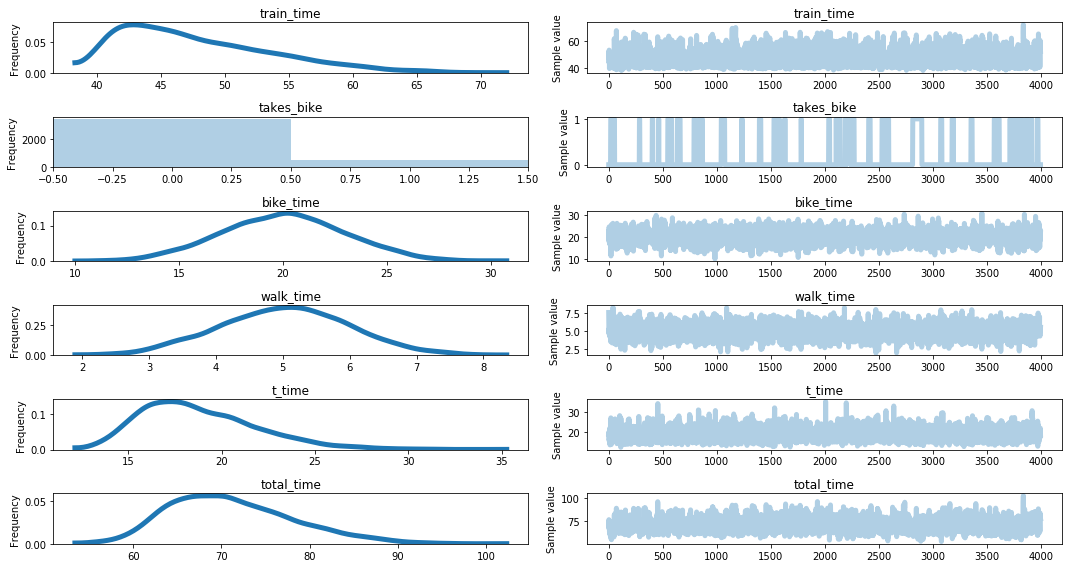

In [4]:
pm.traceplot(base_trace, combined=True, figsize=(15, 8));

# Commute time

In [5]:
base_trace['total_time'].mean()

71.079668979302213

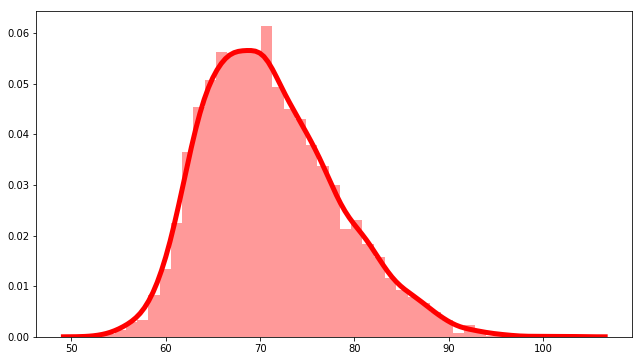

In [6]:
sns.distplot(base_trace['total_time'], color='r');

## "My train is on time!"

In [7]:
with commute(train_time=40):
    on_time_train = pm.sample(2000, njobs=4)

Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [takes_bike]
>NUTS: [total_time, t_time, walk_time, bike_time]
 99%|█████████▉| 2487/2500 [00:17<00:00, 140.07it/s]/Users/colin/anaconda3/envs/pydata_nyc20173.6/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.879221708596, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [00:17<00:00, 139.96it/s]


<center><img src="images/commuter_train.png" style="height: 150px;"></img></center>

In [8]:
on_time_train['bike_time'].shape

(8000,)

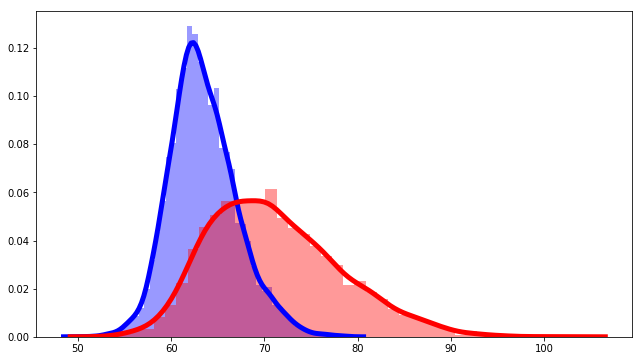

In [9]:
sns.distplot(on_time_train['total_time'], color='b');
sns.distplot(base_trace['total_time'], color='r');

## "My train is 10 minutes late!"

In [10]:
with commute(train_time=50):
    late_train = pm.sample(2000)

Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [takes_bike]
>NUTS: [total_time, t_time, walk_time, bike_time]
100%|██████████| 2500/2500 [00:11<00:00, 216.75it/s]
/Users/colin/anaconda3/envs/pydata_nyc20173.6/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.88675147028, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))


<center><img src="images/commuter_train.png" style="height: 150px;"></img></center>

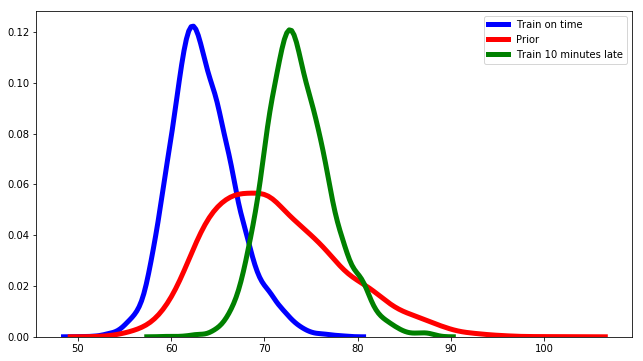

In [11]:
sns.kdeplot(on_time_train['total_time'], label='Train on time', color='b')
sns.kdeplot(base_trace['total_time'], label='Prior', color='r');
sns.kdeplot(late_train['total_time'], label='Train 10 minutes late', color='g');

# "You're early -- how was the bike ride?"

In [12]:
with commute(total_time=55):
    early_trace = pm.sample(2000)

Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [t_time, walk_time, bike_time, train_time]
>Metropolis: [takes_bike]
100%|██████████| 2500/2500 [00:07<00:00, 353.20it/s]


# "You're early -- how was the bike ride?"

<center><img src="images/bike.png" style="height: 150px;"></img></center>

In [13]:
early_trace['takes_bike'].mean(), base_trace['takes_bike'].mean()

(0.99975000000000003, 0.13475000000000001)

<div style="display: inline-block;">
  <img src="images/commuter_train.png" style="float: left; width: 8em; height: auto; border: none;"></img>
  <h2 style="float: right;">What else changes when I am 15 minutes early?</h2>
</div>


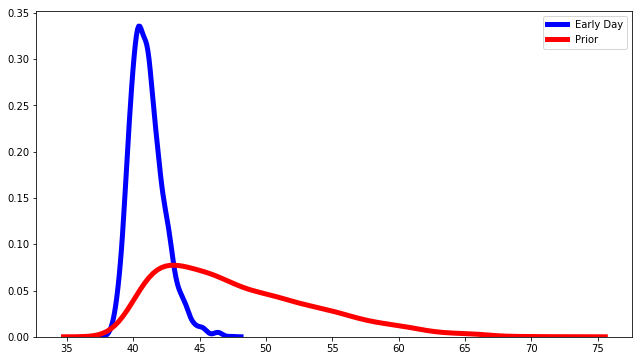

In [14]:
sns.kdeplot(early_trace['train_time'], label='Early Day', color='b');
sns.kdeplot(base_trace['train_time'], label='Prior', color='r');

<div style="display: inline-block;">
  <img src="images/bike.png" style="float: left; height: 4em; width: auto; border: none;"></img>
  <h2 style="float: right;">What else changes when I am 15 minutes early?</h2>
</div>


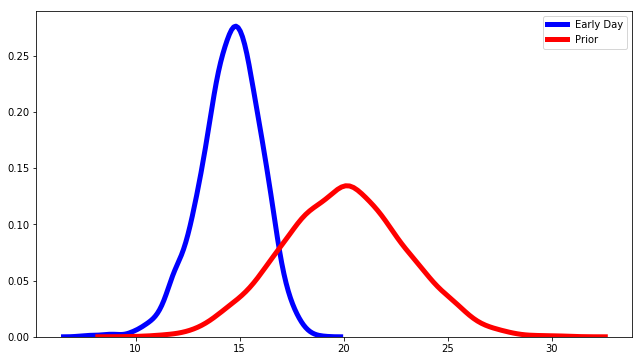

In [15]:
sns.kdeplot(early_trace['bike_time'], label='Early Day', color='b');
sns.kdeplot(base_trace['bike_time'], label='Prior', color='r');

# What else changes when I am 15 minutes early?

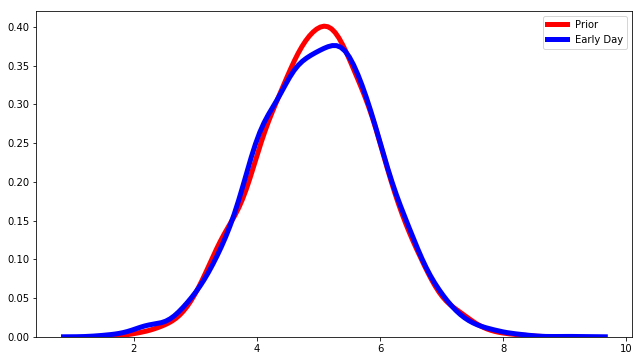

In [16]:
sns.kdeplot(base_trace['walk_time'], label='Prior', color='r');
sns.kdeplot(early_trace['walk_time'], label='Early Day', color='b');


# PyMC3 Supports Latex Representations in notebooks!

In [17]:
commute()

# Exercise 4 and 5

# Extreme data!

In [18]:
with commute(total_time=0.):
    no_time = pm.sample(2000)

Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [t_time, walk_time, bike_time, train_time]
>Metropolis: [takes_bike]
100%|██████████| 2500/2500 [00:08<00:00, 303.83it/s]


# Extreme data!

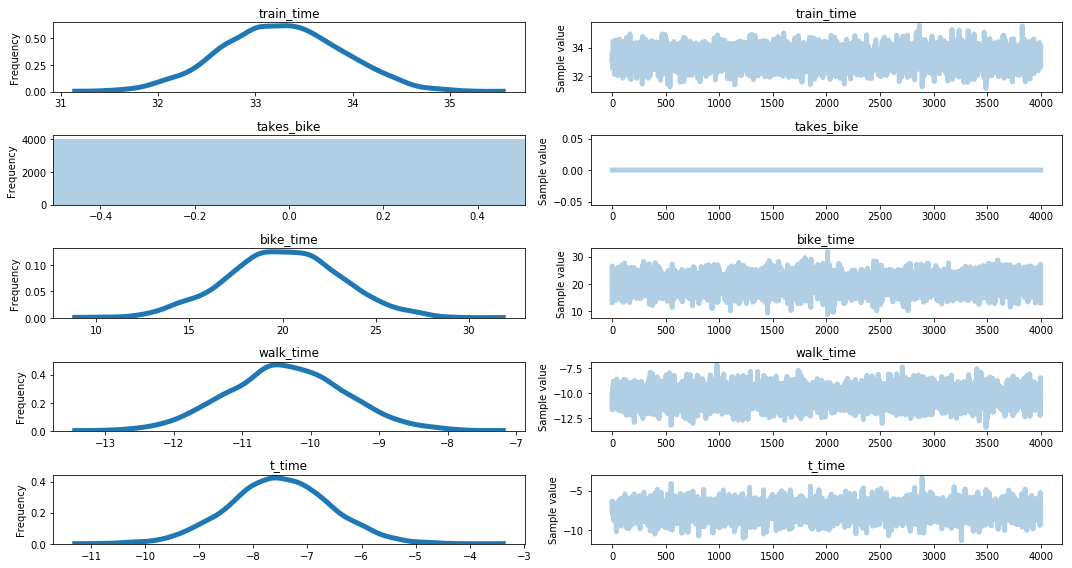

In [19]:
pm.traceplot(no_time, combined=True, figsize=(15, 8));

# Fine tuning distributions

In [20]:
@sampled
def bounded_commute():
    TrainSkewNormal = pm.Bound(pm.SkewNormal, lower=35.)
    BikeNormal = pm.Bound(pm.Normal, lower=15.)
    WalkNormal = pm.Bound(pm.Normal, lower=10.)
    TSkewNormal = pm.Bound(pm.SkewNormal, lower=10.)
    TotalNormal = pm.Bound(pm.Normal, lower=50.)
    
    train_time = TrainSkewNormal('train_time', mu=40., sd=10., alpha=15.)
    takes_bike = pm.Binomial('takes_bike', n=1, p=0.1)
    bike_time = BikeNormal('bike_time', mu=20., sd=3.)
    walk_time = WalkNormal('walk_time', mu=5., sd=1.)
    t_time = TSkewNormal('t_time', mu=15., sd=5., alpha=4.)
    total_time = TotalNormal('total_time', 
                           mu=train_time + tt.switch(takes_bike, bike_time, walk_time+t_time), 
                           sd=1)

# Fine tuning distributions

```python
with bounded_commute(total_time=0.):
    bounded_no_time = pm.sample(2000)
    
# ValueError: Bad initial energy: inf. The model might be misspecified.
```

# Exercise 5